# PISA 2012 Dataset Exploration
## by Daniel Stenberg

## Introduction
PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. This survey examines

* how well students have learned the school curriculum,
* how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

The list of variables in the dataset can be found here: https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisadict2012.csv&sa=D&ust=1554482573645000

As can be seen in this variable list, there are hundreds of variables in the dataset. Too simplify data import and handling, most of these will immediately be excluded.

The dataset that this exploration will work with will consist of variables relating to:

* Nationality
* Educational levels of each parent (mother and father) as defined by the ISCED levels (0-6)
* PISA scores for math, reading and science

### ISCED Level	Description
| Level | Descriptions |
| ---- | :---------------- |
| 0 | Early childhood education; no education |
| 1 | Primary education |
| 2C-2A | Lower-secondary education (Second stage of basic education) |
| 3C | Upper-secondary education: programmes designed to lead directly to labour market, not to ISCED 5A or 5B (e.g. Apprenticeship, Secondary technical school) |
| 3B | Upper-secondary education: programmes designed to provide direct access to ISCED 5B (e.g. Vocational training) |
| 3A | Upper-secondary education: programmes designed to provide direct access to ISCED 5A (e.g. Higher general secondary/Higher technical secondary school) |
| 4B | Post-secondary non-tertiary education not giving access to level 5 (primarily designed for direct labour market entry, e.g. Schools for medical services, Schools for nursing) |
| 4A | Post-secondary non-tertiary education programmes that prepare for entry to ISCED 5 (e.g. follow-up courses, language schools) |
| 5B | First stage of tertiary education (not leading directly to an advanced research qualification; e.g. Higher technical school, polytechnic) |
| 5A | Bachelor’s, Master’s or equivalent level |
| 6 | Doctoral or equivalent level |

Source: https://ec.europa.eu/eurostat/documents/1978984/6037342/ISCED-EN.pdf

### PISA Scores
PISA scores do not have a substantive meaning as they are not physical units, such as metres or grams. Instead, they are
set in relation to the variation in results observed across all test participants. There is theoretically no minimum or maximum
score in PISA; rather, the results are scaled to fit approximately normal distributions, with means around 500 score points and
standard deviations around 100 score points. In statistical terms, a one-point difference on the PISA scale therefore corresponds to an effect size (Cohen's d) of 0.01; and a 10-point difference to an effect size of 0.10.

Source: https://www.oecd-ilibrary.org/docserver/35665b60-en.pdf?expires=1660135670&id=id&accname=guest&checksum=9EFA6E60B481DFF9E2315DD4D4CA1302


## Preliminary Wrangling
The PISA dataset is approx. 2.65 GB in memory size with 635 variables for close to 500,000 students. As this is a huge set of variables, some initial selection is performed upon reading the CSV file. This also helps to reduce loading time and to get more control of variable import.

In the data wrangling, the ISCED information for mothers and fathers are spread over multiple variables. These are transformed to get a single highest ISCED level for each parent.

In [323]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# CNT = Country code
# OECD = OECD country (yes/no)
# ST03Q02 = Year of birth
# ST13Q01 = Mother highest schooling (up to level 3)
# ST17Q01 = Father highest schooling (up to level 3)
# PV1MATH = Plausible value math
# PV1READ = Plausible value reading
# PV1SCIE = Plausible value science
# ST14Q04 = Mother level 4 schooling yes/no
# ST14Q03 - Mother level 5A schooling yes/no
# ST14Q02 - Mother level 5B schooling yes/no
# ST14Q01 - Mother level 56 schooling yes/no
# ST18Q04 = Father level 4 schooling yes/no
# ST18Q03 - Father level 5A schooling yes/no
# ST18Q02 - Father level 5B schooling yes/no
# ST18Q01 - Father level 56 schooling yes/no
usecols = ['CNT', 'OECD', 'ST03Q02', 'ST13Q01', 'ST17Q01', 'PV1MATH', 'PV1READ', 'PV1SCIE', 'ST14Q04', 'ST14Q03', 'ST14Q02', \
           'ST14Q01', 'ST18Q04', 'ST18Q03', 'ST18Q02', 'ST18Q01']

df = pd.read_csv('pisa2012.csv', usecols=usecols, encoding='latin-1')

C:\Users\D29152\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (30,31,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# Rename the columns to something more user-friendly
new_col_names = {
    'CNT': 'country',
    'OECD': 'is_oecd_country',
    'ST03Q02': 'year_of_birth',
    'ST13Q01': 'mother_schooling',
    'ST17Q01': 'father_schooling',
    'PV1MATH': 'math_score',
    'PV1READ': 'reading_score',
    'PV1SCIE': 'science_score',
    'ST14Q04': 'mother_schooling_level4',
    'ST14Q03': 'mother_schooling_level5A',
    'ST14Q02': 'mother_schooling_level5B',
    'ST14Q01': 'mother_schooling_level6',
    'ST18Q04': 'father_schooling_level4',
    'ST18Q03': 'father_schooling_level5A',
    'ST18Q02': 'father_schooling_level5B',
    'ST18Q01': 'father_schooling_level6',
}

df = df.rename(columns=new_col_names)

In [5]:
df['mother_schooling'].value_counts()

<ISCED level 3A>                         236993
<ISCED level 3B, 3C>                      83048
<ISCED level 2>                           82614
<ISCED level 1>                           36556
She did not complete <ISCED level 1>      18768
Name: mother_schooling, dtype: int64

In [6]:
df['father_schooling'].value_counts()

<ISCED level 3A>                        215280
<ISCED level 3B, 3C>                     91179
<ISCED level 2>                          84329
<ISCED level 1>                          35938
He did not complete <ISCED level 1>      16535
Name: father_schooling, dtype: int64

In [7]:
# Wrangle ISCED levels to single columns for highest level
df['mother_isced_level'] = 0

df.loc[df['mother_schooling'] == "<ISCED level 1> ", 'mother_isced_level'] = 1
df.loc[df['mother_schooling'] == "<ISCED level 2> ", 'mother_isced_level'] = 2
df.loc[df['mother_schooling'] == "<ISCED level 3A> ", 'mother_isced_level'] = 3
df.loc[df['mother_schooling'] == "<ISCED level 3B> ", 'mother_isced_level'] = 3
df.loc[df['mother_schooling_level4'] == "Yes", 'mother_isced_level'] = 4
df.loc[df['mother_schooling_level5A'] == "Yes", 'mother_isced_level'] = 5
df.loc[df['mother_schooling_level5B'] == "Yes", 'mother_isced_level'] = 5
df.loc[df['mother_schooling_level6'] == "Yes", 'mother_isced_level'] = 6

df = df.drop(columns=['mother_schooling', 'mother_schooling_level4', 'mother_schooling_level5A', 'mother_schooling_level5B', 'mother_schooling_level6'])

df['mother_isced_level'].value_counts()

5    157608
3     77388
0     72845
2     66650
4     49380
1     36556
6     25063
Name: mother_isced_level, dtype: int64

In [8]:
df['father_isced_level'] = 0

df.loc[df['father_schooling'] == "<ISCED level 1> ", 'father_isced_level'] = 1
df.loc[df['father_schooling'] == "<ISCED level 2> ", 'father_isced_level'] = 2
df.loc[df['father_schooling'] == "<ISCED level 3A> ", 'father_isced_level'] = 3
df.loc[df['father_schooling'] == "<ISCED level 3B> ", 'father_isced_level'] = 3
df.loc[df['father_schooling_level4'] == "Yes", 'father_isced_level'] = 4
df.loc[df['father_schooling_level5A'] == "Yes", 'father_isced_level'] = 5
df.loc[df['father_schooling_level5B'] == "Yes", 'father_isced_level'] = 5
df.loc[df['father_schooling_level6'] == "Yes", 'father_isced_level'] = 6

df = df.drop(columns=['father_schooling', 'father_schooling_level4', 'father_schooling_level5A', 'father_schooling_level5B', 'father_schooling_level6'])

df['father_isced_level'].value_counts()

5    145434
0     88911
3     67718
2     66728
4     51172
1     35938
6     29589
Name: father_isced_level, dtype: int64

In [73]:
df['mean_score'] = (df['math_score'] + df['reading_score'] + df['science_score'])/3
df['mean_score'].sample(5)

189792    467.500533
462836    315.880900
235752    427.193367
287244    454.343100
81570     528.170633
Name: mean_score, dtype: float64

In [9]:
print('Dataframe shape:\n' + str(df.shape) + '\n')
print('Dataframe types:\n' + str(df.dtypes) + '\n')
print('Dataframe top rows:\n' + str(df.head()) + '\n')
print('Dataframe summary stats:\n' + str(df.describe()) + '\n')

Dataframe shape:
(485490, 8)

Dataframe types:
country                object
is_oecd_country        object
year_of_birth           int64
math_score            float64
reading_score         float64
science_score         float64
mother_isced_level      int64
father_isced_level      int64
dtype: object

Dataframe top rows:
   country is_oecd_country  year_of_birth  math_score  reading_score  \
0  Albania        Non-OECD           1996    406.8469       249.5762   
1  Albania        Non-OECD           1996    486.1427       406.2936   
2  Albania        Non-OECD           1996    533.2684       401.2100   
3  Albania        Non-OECD           1996    412.2215       547.3630   
4  Albania        Non-OECD           1996    381.9209       311.7707   

   science_score  mother_isced_level  father_isced_level  
0       341.7009                   3                   3  
1       548.9929                   6                   3  
2       499.6643                   6                   6  
3       4

In [10]:
df['country'].nunique()

68

In [11]:
df['year_of_birth'].value_counts()

1996    451476
1997     34014
Name: year_of_birth, dtype: int64

### What is the structure of your dataset?

There are 485,490 students in the data set with the following variables (selected at data import):
* Country (code)
* OECD country
* Year of birth
* Mother highest schooling level
* Father highest schooling level
* Plausible math score
* Plausible reading score
* Plausible science score
* Mean score of all three subjects

### Main feature(s) of interest

I am interested in seeing how profiency in different subjects relate to one another, such as if reading score corrlates to math and science scores.

I also want to investigate how the schooling levels of parents influence their childrens scores and if there's a difference in whether mothers or fathers educational level influence their childrens' PISA performance.

### Hypothesis on relevant features and relationships

I expect reading profiency helps in the other school subjects. I also expect parents with higher schooling qualifications to have children with higher PISA scores.

## Univariate Exploration

### PISA Score Distributions
The following histograms are set up to reveal the distribution of PISA scores for each subject as well as for the total average score.

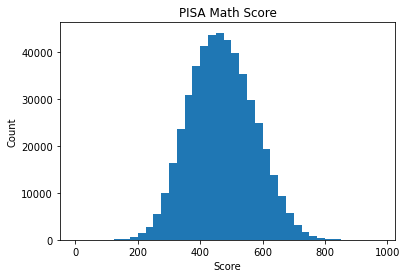

In [14]:
#bins = np.arange(0, df['math_score'].max()+25, 25)
bins = np.arange(0, 1000, 25) # Set standard bin size and range for all PISA histograms

plt.hist(data=df, x='math_score', bins=bins);
plt.xlabel("Score");
plt.ylabel("Count");
plt.title("PISA Math Score");

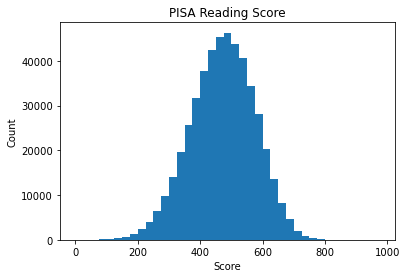

In [16]:
#bins = np.arange(0, df['reading_score'].max()+25, 25)
bins = np.arange(0, 1000, 25) # Set standard bin size and range for all PISA histograms

plt.hist(data=df, x='reading_score', bins=bins);
plt.xlabel("Score");
plt.ylabel("Count");
plt.title("PISA Reading Score");

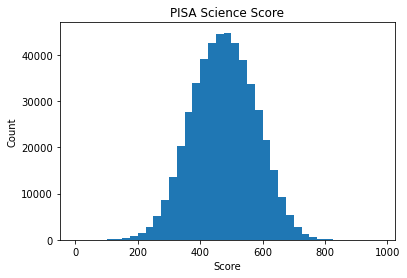

In [17]:
#bins = np.arange(0, df['science_score'].max()+25, 25)
bins = np.arange(0, 1000, 25) # Set standard bin size and range for all PISA histograms

plt.hist(data=df, x='science_score', bins=bins)
plt.xlabel("Score");
plt.ylabel("Count");
plt.title("PISA Science Score");

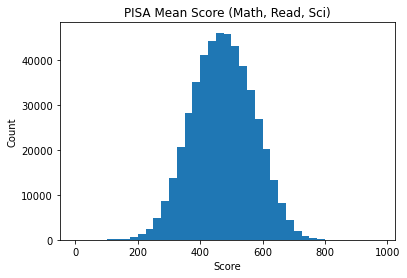

In [213]:
#bins = np.arange(0, df['mean_score'].max()+25, 25)
bins = np.arange(0, 1000, 25) # Set standard bin size and range for all PISA histograms

plt.hist(data=df, x='mean_score', bins=bins)
plt.xlabel("Score");
plt.ylabel("Count");
plt.title("PISA Mean Score (Math, Read, Sci)");

These are all normally distributed in accordance to PISA score definitions

### Parents Educational Level
Next, we take a closer look at the mothers and fathers and their educational levels as defined by ISCED levels 0-6.

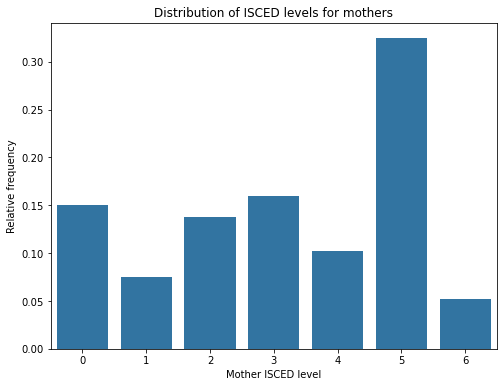

In [54]:
base_color = sb.color_palette()[0]

type_counts = df['mother_isced_level'].value_counts()
total = df['mother_isced_level'].value_counts().sum()
max_type_count = type_counts.max()
max_prop = max_type_count / total
#tick_props = np.arange(0, max_prop, 0.05)
tick_props = np.arange(0, 0.35, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize=(8,6))
sb.countplot(data=df, x='mother_isced_level', color=base_color);
plt.yticks(tick_props * total, tick_names);
plt.xlabel("Mother ISCED level");
plt.ylabel("Relative frequency");
plt.title("Distribution of ISCED levels for mothers");

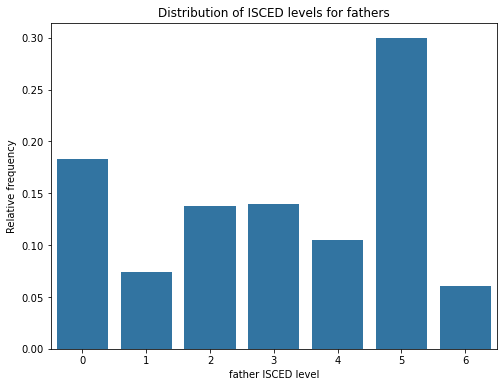

In [55]:
base_color = sb.color_palette()[0]

type_counts = df['father_isced_level'].value_counts()
total = df['father_isced_level'].value_counts().sum()
max_type_count = type_counts.max()
max_prop = max_type_count / total
#tick_props = np.arange(0, max_prop, 0.05)
tick_props = np.arange(0, 0.35, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize=(8,6))
sb.countplot(data=df, x='father_isced_level', color=base_color);
plt.yticks(tick_props * total, tick_names);
plt.xlabel("Father ISCED level");
plt.ylabel("Relative frequency");
plt.title("Distribution of ISCED levels for fathers");

Some similarities and differences are noted between mothers and fathers discussed at the end of this section.

### Participation and Nationality
Below, we summarize the nationalities of all children participating in the PISA study.

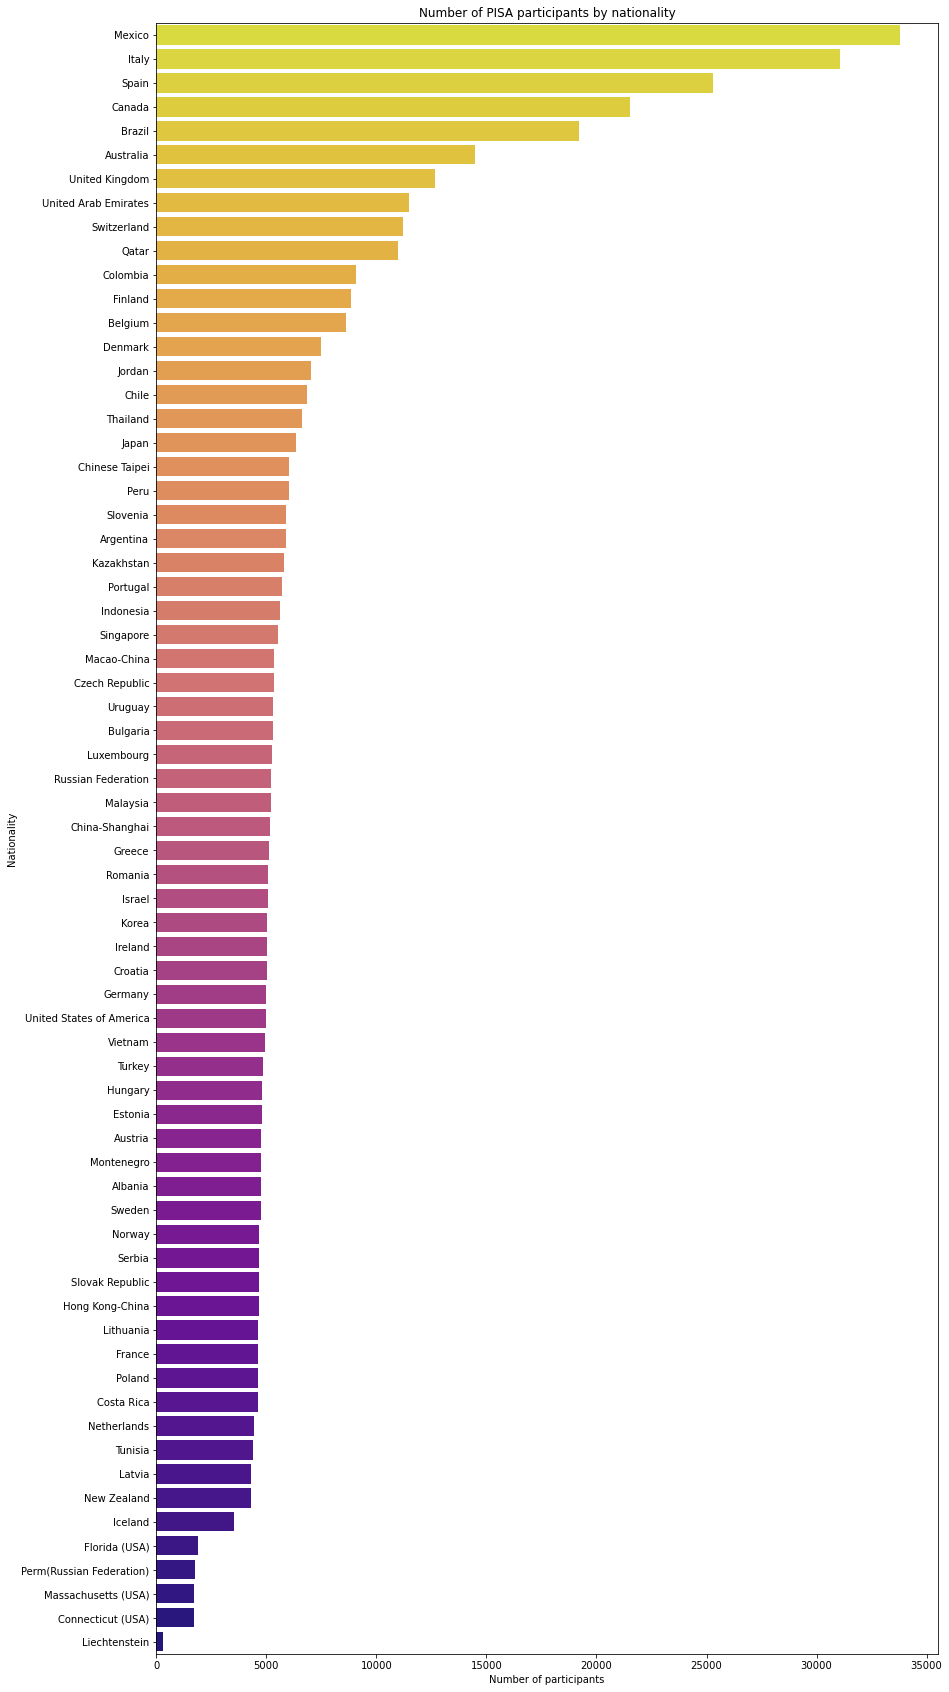

In [64]:
country_order = df['country'].value_counts().index

plt.figure(figsize=(14,30))
sb.countplot(data=df, y='country', order=country_order, palette='plasma_r');
plt.title("Number of PISA participants by nationality");
plt.xlabel("Number of participants");
plt.ylabel("Nationality");

### Univariate Analysis Comments

The scores for math, reading and science all look similarly distributed as normal distributions with mean value around 500. As mentioned, this was to be expected for the PISA scores.

Regarding the educational levels of parents, the most common ISCED level is 5. Mothers appear to have a slightly higher frequency of level 5 studies. The lowest level (0) is more associated with fathers than mothers.

Based on the nationality column, it is clear that some countries have a large number of participants in the PISA studies. The list is topped by Mexico. Liechtenstein, however, only has a low number of participants which is natural due to it being a very small country.

I transformed axis markers to make relative frequency histograms for mothers and fathers ISCED levels as it made more sense to look at it in relative terms.

I was surprised that there was such a high occurence of low educational level, especially among fathers. However, level 5 ISCED level, corresponding to tertiary level education, was surprisingly high to me. I though it would be more evenly distributed among these levels.

## Bivariate Exploration

### Math and science scores related to reading score
We start by looking at the different score categories and how they relate to eachother, especially focusing on how reading score relates to the other two.

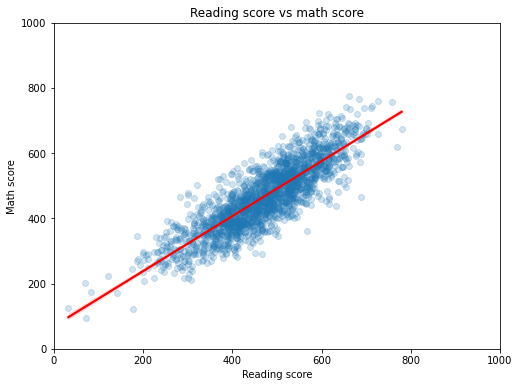

In [199]:
# Reduce number of points to plot through random sampling
plt.figure(figsize=(8,6))
#plt.scatter(data=df.sample(10000), x='reading_score', y='math_score', alpha=0.1);
sb.regplot(data=df.sample(2000), x='reading_score', y='math_score', line_kws={'color': 'red'}, scatter_kws={'alpha': 0.2})
plt.xlabel("Reading score");
plt.ylabel("Math score");
plt.title("Reading score vs math score");
plt.xlim(0, 1000);
plt.ylim(0, 1000);

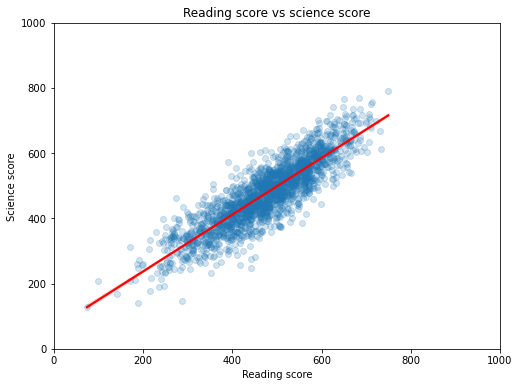

In [202]:
# Reduce number of points to plot through random sampling
plt.figure(figsize=(8,6))
#plt.scatter(data=df.sample(10000), x='reading_score', y='science_score', alpha=0.1);
sb.regplot(data=df.sample(2000), x='reading_score', y='science_score', line_kws={'color': 'red'}, scatter_kws={'alpha': 0.2});
plt.xlabel("Reading score");
plt.ylabel("Science score");
plt.title("Reading score vs science score");
plt.xlim(0, 1000);
plt.ylim(0, 1000);

Clear correlation between scores in different subjects are noted.

### ISCED levels of mother and fathers
Next we create more suitable diagrams (bivariate) for comparison of mothers and fathers educational levels (0-6).

Text(0.5, 1.0, 'ISCED educational levels mothers and fathers')

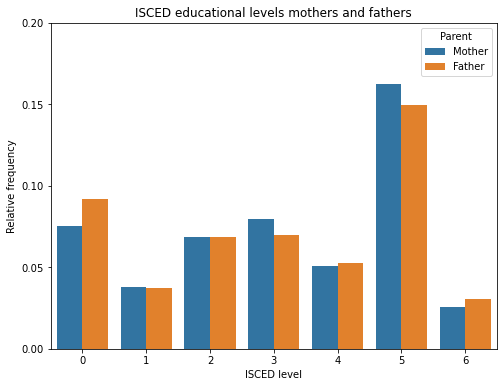

In [246]:
df_plot_mothers = df.drop(columns=['father_isced_level'])
df_plot_mothers['parent'] = "Mother"
df_plot_mothers = df_plot_mothers.rename(columns={'mother_isced_level': "isced_level"})
df_plot_fathers = df.drop(columns=['mother_isced_level'])
df_plot_fathers['parent'] = "Father"
df_plot_fathers = df_plot_fathers.rename(columns={'father_isced_level': "isced_level"})
df_plot_parents = pd.concat([df_plot_mothers, df_plot_fathers])
df_plot_parents.head()

type_counts = df_plot_parents['isced_level'].value_counts()
total = df_plot_parents['isced_level'].value_counts().sum()
tick_props = np.arange(0, 0.25, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize=(8,6))
sb.countplot(data=df_plot_parents, x='isced_level', hue='parent');
plt.legend(title="Parent");
plt.xlabel("ISCED level");
plt.ylabel("Relative frequency");
plt.yticks(tick_props * total, tick_names);
plt.title("ISCED educational levels mothers and fathers")

   parent  isced_level
0  Father     3.052462
1  Mother     3.167847


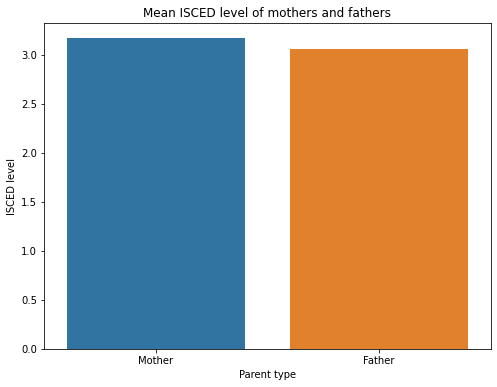

In [328]:
plt.figure(figsize=(8,6))
df_plot_parents_groupby = df_plot_parents.groupby(by=['parent']).mean().reset_index()
sb.barplot(data=df_plot_parents, y='isced_level', x='parent', ci=None);
plt.title("Mean ISCED level of mothers and fathers")
plt.xlabel("Parent type");
plt.ylabel("ISCED level");
print(df_plot_parents_groupby[['parent', 'isced_level']])

Similar differences are noted as in the univariate eploration, but made easier to interprate here. It is also clear that on average fathers have slightly lower levels.

### Relating parent educational level to child PISA score
In the following diagrams, we are now able to correlate and show distributions for how PISA scores are influenced by mother and father ISCED levels respectively.

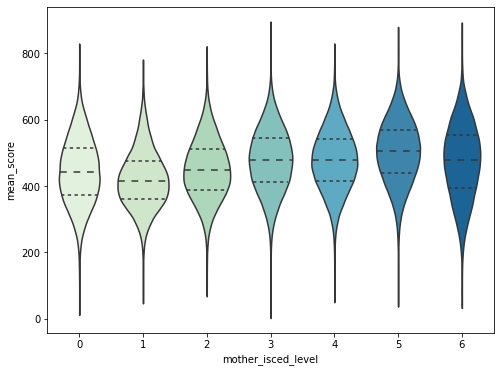

In [227]:
plt.figure(figsize=(8,6))
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='mother_isced_level', y='mean_score', inner='quartile', palette="GnBu");
plt.title("Mean PISA subject score related to mother ISCED level")
plt.xlabel("Mother ISCED level");
plt.ylabel("Mean PISA subject score");

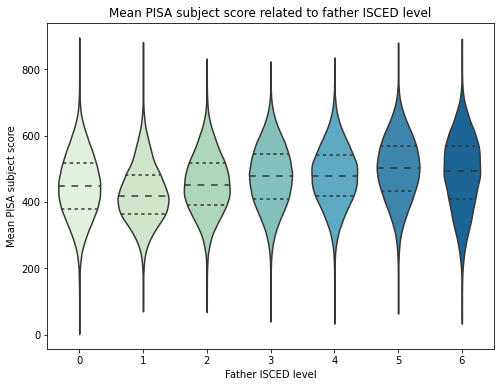

In [329]:
plt.figure(figsize=(8,6))
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='father_isced_level', y='mean_score', inner='quartile', palette="GnBu");
plt.title("Mean PISA subject score related to father ISCED level")
plt.xlabel("Father ISCED level");
plt.ylabel("Mean PISA subject score");

In general, the PISA score increases with parent ISCED level but with large variance.

### Bivariate Analysis Comments

It is clear that high PISA scores in math and science is highly correlated with high scores in reading. The rate of correlation looks approximately the same for all subjects.

On average, fathers have slightly lower educational ISCED levels than mothers.

It seems on average that parents with higher educational ISCED levels have children with higher PISA score. There is a drop off for highest ISCED level (6) that is slightly more protruding for mothers than for fathers.

Also, for level 6 ISCED, the distribution of PISA scores is more spread out than for other levels.

It is also curious that the median PISA score for level 0 parents is higher than for level 1 parents.

## Multivariate Exploration

### Correlating math, science and reading scores

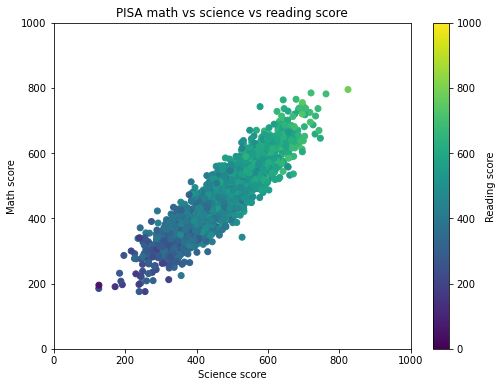

In [284]:
plt.figure(figsize=(8,6))
plt.scatter(data=df.sample(2000), x='science_score', y='math_score', c='reading_score');
plt.colorbar(label="Reading score")
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.clim(0, 1000);
plt.title("PISA math vs science vs reading score");
plt.xlabel("Science score")
plt.ylabel("Math score");

In a single multivariate plot, the posiive correlation of PISA scores in the different subjects is revealed.

### Mothers and fathers ISCED levels in different countries

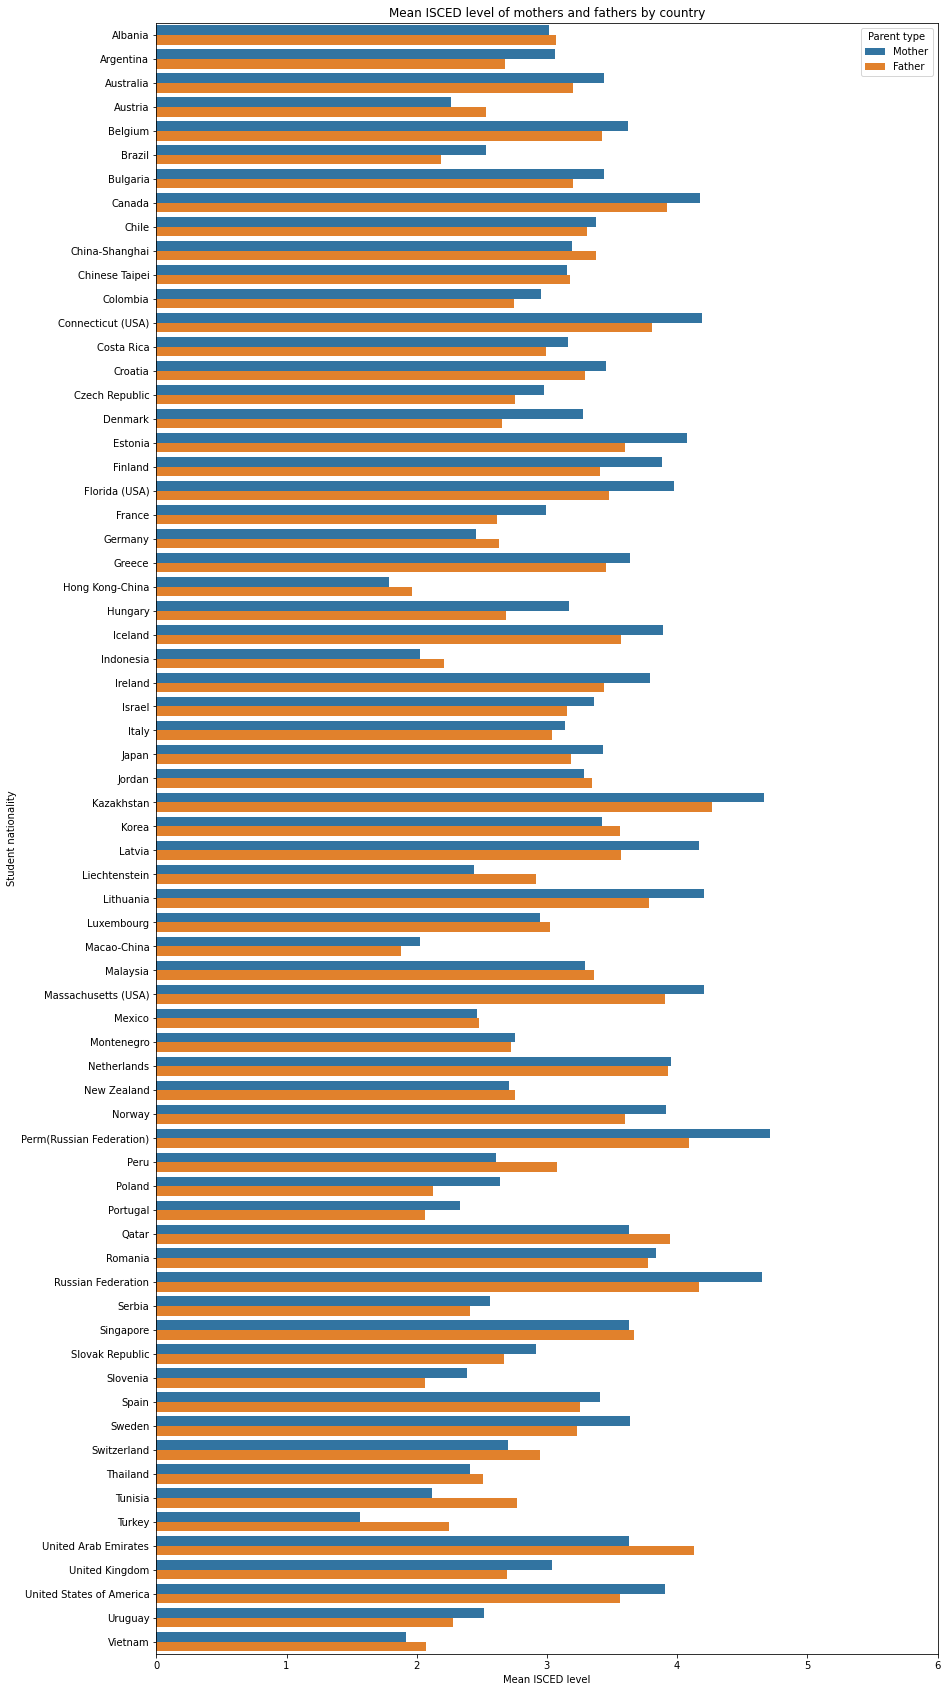

In [280]:
df_plot_parents_country_groupby = df_plot_parents.groupby(by=['parent', 'country']).mean().reset_index().copy()

plt.figure(figsize=(14, 30))

sb.barplot(data=df_plot_parents_country_groupby, x='isced_level', y='country', hue='parent', hue_order=['Mother', 'Father'])

plt.legend(title="Parent type");
plt.title('Mean ISCED level of mothers and fathers by country');
plt.ylabel("Student nationality")
plt.xlabel("Mean ISCED level");
plt.xlim(0, 6);

Different countries have different educational levels for mothers and fathers respectively.

### Mothers and Fathers ISCED levels relation to child PISA score

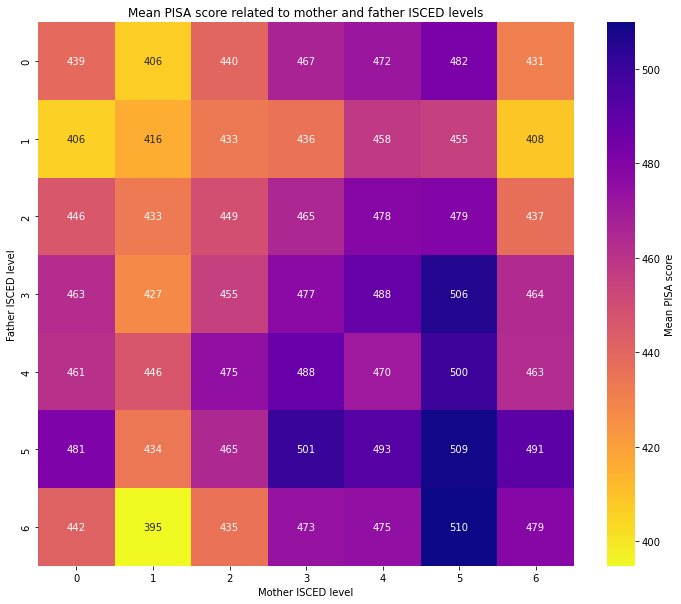

In [322]:
cat_means = df.groupby(['mother_isced_level', 'father_isced_level']).mean()['mean_score']
cat_means = cat_means.reset_index(name = 'mean_score_avg')
cat_means = cat_means.pivot(index = 'father_isced_level', columns = 'mother_isced_level', values = 'mean_score_avg')

plt.figure(figsize=(12,10))
sb.heatmap(cat_means, annot = True, fmt='.0f', cmap='plasma_r', cbar_kws = {'label' : 'Mean PISA score'})
plt.xlabel("Mother ISCED level")
plt.ylabel("Father ISCED level")
plt.title("Mean PISA score related to mother and father ISCED levels");

Some patterns and outliers are identified and discussed below.

### Multivariate Analysis Comments

Looking at the relationships between scores in math, science and reading in a multivariate scatter plot, the correlations is clear that higher scores in one subject is associated with higher scores in the other subjects as well.

From the ISCED levels of mothers and fathers it is shown that the mean ISCED levels of mothers and fathers as separate groups is different in different countries. For instance, in the UAE and Turkey fathers are more well-educated whereas in Finland and Canada it is the opposite. In some countries like Italy and the Netherlands it is more even between mothers and fathers on average.

It is also shown how mean PISA score is distributed for mother and fasther ISCED levels in a multivariate heat map. Here one can see that the highest scores coincide with a mother with ISCED level 5. This indicates that the mothers have a higher influence on their childrens PISA scores than the fathers.

Interestingly, the lowest score is identifed for mothers with ISCED level 1 and father ISCED level 6.

## Conclusions
In this analysis, it was shown how parents educational levels related to PISA scores of their respective children. Some interesting patterns were found such as that highest levels of parent education level was coupled with a large spread of child PISA score. Also, mothers educational level seemed to be more influential than the fathers.